In [17]:
import pandas as pd
import csv
import numpy
import matplotlib.pyplot as plt  # To visualize
import pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_listing = pd.read_csv("../../raw_data/sfo/listings.csv")
df_rental = pd.read_csv("data/avg_rental_sfo.csv")

In [3]:
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,132,2,257,2020-07-30,1.91,1,177
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.81,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.14,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2018-09-12,0.11,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,750,5,28,2019-06-28,0.21,2,365


In [4]:
df_listing.head()["neighbourhood"]

0    Western Addition
1      Bernal Heights
2      Haight Ashbury
3      Haight Ashbury
4    Western Addition
Name: neighbourhood, dtype: object

In [5]:
df_rental

,neighbourhood,Average Rent
0,Alamo Square,3456
1,Anza Vista,3468
2,Ashbury Heights,3809
3,Bayview,3361
4,Bayview Heights,3361
...,...,...
87,Visitacion Valley,3868
88,West of Twin Peaks,3158
89,Western Addition,3030
90,Westwood Park,3907


In [6]:
df = pd.merge(df_listing, df_rental, on="neighbourhood")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Average Rent
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,132,2,257,2020-07-30,1.91,1,177,3030
1,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,750,5,28,2019-06-28,0.21,2,365,3030
2,10824,Victorian House in Hayes Valley - 3BED-2BA,38836,Bernat,NaN,Western Addition,37.77355,-122.42436,Entire home/apt,166,30,15,2019-08-18,0.15,38,364,3030
3,18904,Lower Haight Urban Zen with private bath,72464,Patrick,NaN,Western Addition,37.77252,-122.43216,Private room,130,2,415,2020-03-10,3.92,2,90,3030
4,25463,Modern Zen in the Lower Haight,72464,Patrick,NaN,Western Addition,37.77729,-122.43421,Private room,110,2,446,2020-03-17,3.73,2,0,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,41890513,Newly Remodeled Guest Suite 1BR/1BA in SF!,16191132,Ek,NaN,Visitacion Valley,37.71787,-122.40348,Entire home/apt,190,30,3,2020-02-26,0.48,2,0,3868
7270,42136964,Happy family Room C ( free noodle at POT& NOOD...,277785826,Zheng,NaN,Visitacion Valley,37.71306,-122.40158,Private room,85,1,2,2020-02-27,0.34,1,0,3868
7271,43947688,"Huge, quiet 2-story, hot tub, views, king beds",9194713,Lance,NaN,Visitacion Valley,37.71824,-122.40251,Entire home/apt,451,2,0,NaN,NaN,6,108,3868
7272,44520574,Daly City: 2 Private Rooms for Four,245142983,Kelly & Angelo,NaN,Visitacion Valley,37.70620,-122.41743,Entire home/apt,139,1,0,NaN,NaN,1,158,3868


In [7]:
df[df["room_type"] == "Entire home/apt"]["price"]

0       132
1       750
2       166
5       480
6       110
       ... 
7268    179
7269    190
7271    451
7272    139
7273    110
Name: price, Length: 4339, dtype: int64

In [8]:
df["Average Rent"]

0       3030
1       3030
2       3030
3       3030
4       3030
        ... 
7269    3868
7270    3868
7271    3868
7272    3868
7273    2616
Name: Average Rent, Length: 7274, dtype: int64

In [13]:
X = df[df["room_type"] == "Entire home/apt"]["price"].values.reshape(-1, 1)
Y = df[df["room_type"] == "Entire home/apt"]["Average Rent"].values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

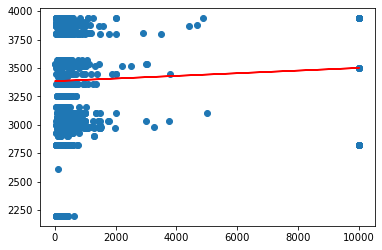

In [14]:
plt.scatter(X.ravel().tolist(),Y)
plt.plot(X.ravel().tolist(), Y_pred, color='red')
plt.show()

In [15]:
# The coefficients
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[0.01163889]]


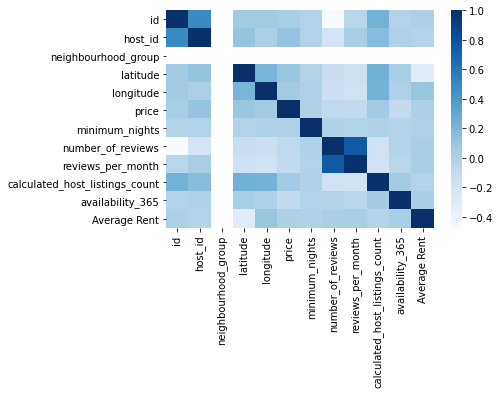

In [18]:
corr = df.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues")

plt.show()

In [19]:
print(corr)

                                      id   host_id  neighbourhood_group  \
id                              1.000000  0.491270                  NaN   
host_id                         0.491270  1.000000                  NaN   
neighbourhood_group                  NaN       NaN                  NaN   
latitude                        0.068249  0.120228                  NaN   
longitude                       0.071034  0.018512                  NaN   
price                           0.044761  0.115947                  NaN   
minimum_nights                 -0.006428 -0.008990                  NaN   
number_of_reviews              -0.472007 -0.208796                  NaN   
reviews_per_month              -0.043261  0.039745                  NaN   
calculated_host_listings_count  0.236622  0.163623                  NaN   
availability_365               -0.021267  0.008937                  NaN   
Average Rent                    0.012977 -0.015431                  NaN   

                        

In [22]:
df1 = df[df["room_type"] == "Entire home/apt"][['price', 'Average Rent']]
df1

,price,Average Rent
0,132,3030
1,750,3030
2,166,3030
5,480,3030
6,110,3030
...,...,...
7268,179,3868
7269,190,3868
7271,451,3868
7272,139,3868


In [23]:
df1.corr()

,price,Average Rent
price,1.000000,0.026309
Average Rent,0.026309,1.000000
